# Объяснение парадокса «Друг Вигнера» с помощью Qiskit

Добро пожаловать в обучающий курс по коду для части серии «Парадоксы» на YouTube-канале Qiskit, посвящённой «Другу Вигнера». В этом руководстве мы поможем вам лучше понять знаменитый мысленный эксперимент Вигнера, используя квантовые схемы, созданные с помощью Qiskit!

Если вы ещё этого не сделали, рекомендую сначала посмотреть [наше видео](https://youtu.be/TMBK88Mpg5U) на YouTube-канале Qiskit, где объясняется контекст мысленного эксперимента и даётся полезный обзор кода Qiskit, который мы будем использовать для симуляции в данном руководстве. Также советую ознакомиться с записью в блоге (ссылка появится позже) для более глубокого изучения фона мысленного эксперимента.

Давайте кратко рассмотрим мысленный эксперимент «Друг Вигнера», симулируя каждый его шаг с помощью кода Qiskit:

### Мысленный эксперимент «Друг Вигнера»

В 1961 году лауреат Нобелевской премии Юджин Вигнер предложил мысленный эксперимент «Друг Вигнера». Этот эксперимент является самым наглядным примером знаменитой «проблемы измерения» в квантовой механике.

Вигнер представил, что его друг измеряет квантовую систему, находящуюся в суперпозиции двух состояний. Давайте смоделируем эту квантовую систему как кубит, который начинается в равновесной суперпозиции |0⟩ и |1⟩. Если вы не знакомы с кубитами и квантовыми вентилями, такими как Hadamard и CNOT, я рекомендую изучить курс «Введение в квантовые вычисления» в [учебнике Qiskit](https://learn.qiskit.org/course/introduction/why-quantum-computing), прежде чем вернуться к этому руководству.

Когда друг Вигнера измеряет кубит, он видит один результат: |0⟩ или |1⟩. Друг заявляет: «Прямо сейчас моё измерение проецировало кубит в состояние 0!» или «Прямо сейчас моё измерение проецировало кубит в состояние |1⟩!»

Чтобы смоделировать это в виде квантовой схемы, кроме использования кубита для представления измеряемой квантовой системы, я добавлю ещё один кубит, который будет представлять память друга Вигнера. Оба кубита — кубит квантовой системы и кубит памяти друга Вигнера — начинаются в состоянии |0⟩. Для подготовки кубита системы в суперпозицию я применю вентиль Адамара (Hadamard gate):

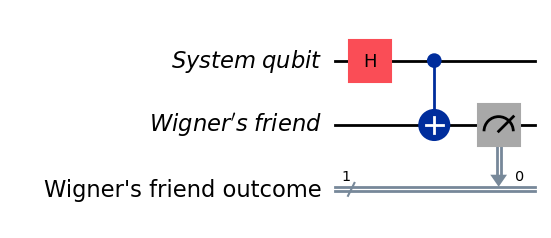

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr1 = QuantumRegister(1, name="System qubit")
qr2 = QuantumRegister(1, name="Wigner's friend")
cr1 = ClassicalRegister(1, name="Wigner's friend outcome")

qc= QuantumCircuit(qr1, qr2, cr1)
qc.h(0)
qc.cx(0,1)
qc.measure(1,0)

qc.draw("mpl")


The Hadamard gate acts on a |0⟩ state as follows:

$$H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$$

Затем, чтобы смоделировать измерение кубита системы другом Вигнера, я применяю вентиль CNOT, где кубит системы является управляющим, а память друга Вигнера — целевым. Если кубит системы находится в состоянии |0⟩, кубит памяти записывает |0⟩. Если кубит системы находится в состоянии |1⟩, кубит памяти изменяется вентилем X, чтобы записать |1⟩.

$$CNOT\frac{1}{2}(|0\rangle + |1\rangle)|0\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$

Наконец, я добавил необратимую операцию измерения кубита памяти друга Вигнера. Это означает, что при каждом запуске схемы будет только один результат: друг Вигнера либо видит |0⟩, либо |1⟩.

Let's run this circuit: 

Wigner's friend Counts:  {'1': 519, '0': 505}


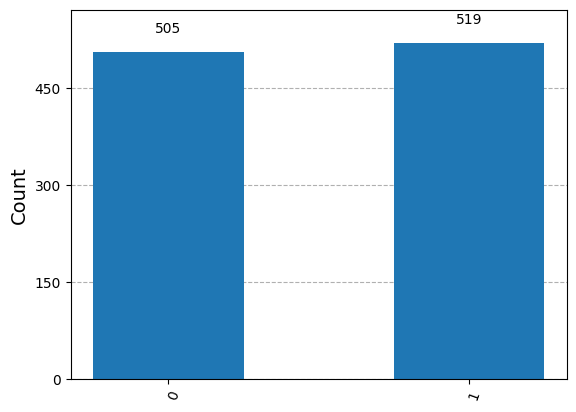

In [2]:
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

backend = AerSimulator()
result = backend.run(qc).result()

print("Wigner's friend Counts: ", result.get_counts())
plot_histogram(result.get_counts())


Друг Вигнера при каждом запуске видит либо |0⟩, либо |1⟩.

Теперь представим, что до этого момента Вигнер был полностью изолирован от своего друга. Он не может заглянуть через плечо друга и увидеть результат измерения сам. Он узнаёт, в какое состояние система была спроецирована, только после того, как спросит друга, и тот поделится информацией. Это означает, что с точки зрения Вигнера и его друг, и кубит находятся в запутанной суперпозиции до момента, когда друг объявляет, какое состояние было измерено. Более конкретно, они существуют в суперпозиции: кубит в состоянии |0⟩, а память друга в состоянии |0⟩, и кубит в состоянии |1⟩, а память друга в состоянии |1⟩.

Вигнер спрашивает своего друга, какой результат тот измерил. Друг отвечает, предоставляя Вигнеру единичный результат, |0⟩ или |1⟩. Затем Вигнер заявляет: «Прямо сейчас моё измерение проецировало кубит и моего друга в состояние |0⟩!» или «Прямо сейчас моё измерение проецировало кубит и моего друга в состояние |1⟩!».

Чтобы смоделировать версию событий Вигнера как квантовую схему, нам нужно ввести кубит для памяти Вигнера, вентиль CNOT для запутывания кубита памяти Вигнера с кубитом памяти друга и, наконец, необратимую операцию измерения кубита памяти Вигнера:

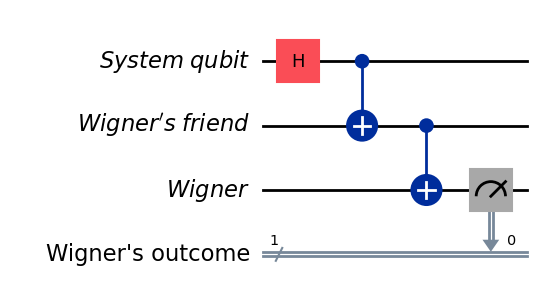

In [3]:
qr3 = QuantumRegister(1, name="Wigner")
cr2 = ClassicalRegister(1, name="Wigner's outcome")

qc2= QuantumCircuit(qr1, qr2,qr3, cr2)
qc2.h(0)
qc2.cx(0,1)
qc2.cx(1,2)
qc2.measure(2,0)

qc2.draw("mpl")


Let's run the circuit:

Wigner's Counts:  {'0': 509, '1': 515}


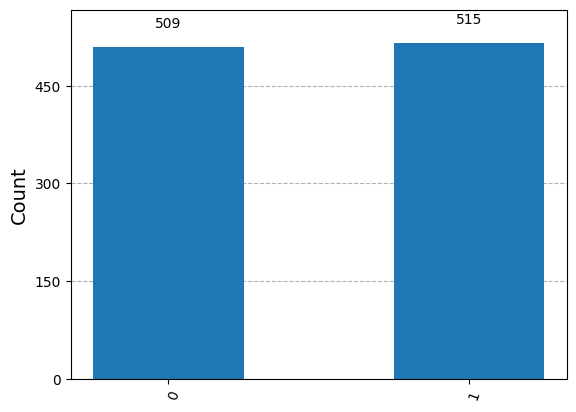

In [4]:
result = backend.run(qc2).result()

print("Wigner's Counts: ", result.get_counts())
plot_histogram(result.get_counts())


Когда Вигнер узнаёт результат измерения своего друга, он видит единичный результат: либо |0⟩, либо |1⟩.

Так когда же кубит действительно был спроецирован в одно из этих состояний? Если акт наблюдения вызывает необратимый коллапс, возникает противоречие: друг Вигнера утверждает, что необратимый коллапс произошёл в момент, когда друг измерил кубит, тогда как Вигнер утверждает, что необратимый коллапс произошёл в момент, когда он измерил результат своего друга.

Давайте рассмотрим полную квантовую схему с точки зрения друга Вигнера:

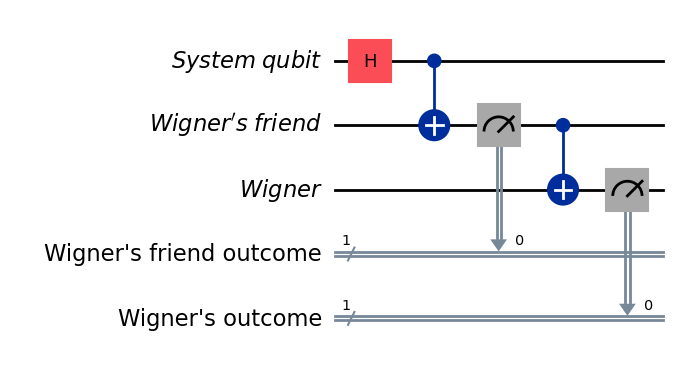

In [5]:
qc3= QuantumCircuit(qr1, qr2, qr3, cr1, cr2)
qc3.h(0)
qc3.cx(0,1)
qc3.measure(qr2,cr1)
qc3.cx(1,2)
qc3.measure(qr3, cr2)

qc3.draw("mpl")


Compare this to the full quantum circuit from Wigner's perspective: 

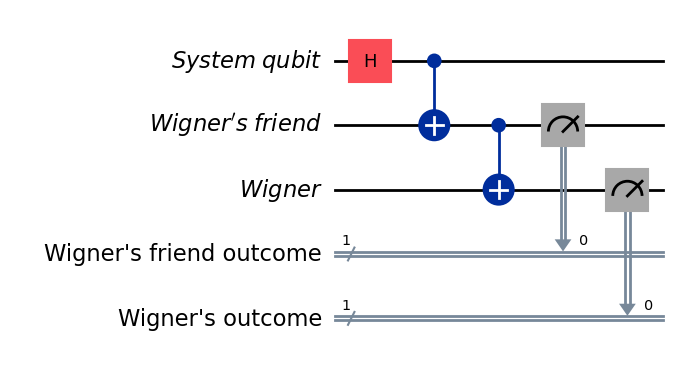

In [6]:
qc4= QuantumCircuit(qr1, qr2, qr3, cr1, cr2)
qc4.h(0)
qc4.cx(0,1)
qc4.cx(1,2)
qc4.measure(qr2,cr1)
qc4.measure(qr3, cr2)

qc4.draw("mpl")


Две квантовые схемы расходятся во мнении о том, должна ли необратимая операция измерения памяти друга Вигнера быть до или после второго вентиля CNOT, то есть до измерения Вигнером результата своего друга или после него. Принцип «отложенного измерения» в квантовых вычислениях утверждает, что перенос необратимого измерения через управляющий вентиль в квантовой схеме не изменит распределение результатов измерений. Таким образом, мы всегда получим одинаковое распределение финальных результатов, что можно увидеть при выполнении симуляций обеих схем:

In [7]:
result = backend.run(qc3).result()

print("Wigner's Friend's Counts: ", result.get_counts())


Wigner's Friend's Counts:  {'0 0': 502, '1 1': 522}


In [8]:
result = backend.run(qc4).result()

print("Wigner's Counts: ", result.get_counts())


Wigner's Counts:  {'0 0': 523, '1 1': 501}


Однако Вигнер и его друг расходятся в объяснении этих результатов. В следующей части серии «Парадоксы» мы увидим, как в модифицированной схеме разница между объяснениями Вигнера и его друга на самом деле приводит к различным финальным результатам.

Это противоречие между мнениями Вигнера и его друга о том, где должно происходить необратимое измерение, является версией знаменитой проблемы измерения в квантовой механике.

Традиционное объяснение измерения в квантовой механике известно как «Копенгагенская интерпретация», которая в общем предполагает, что наблюдение квантовой системы вызывает её необратимый коллапс в одно состояние. Копенгагенская интерпретация настолько расплывчата, что не даёт объяснения, как именно происходит измерение! Она не может разрешить парадокс друга Вигнера, так как просто не содержит дополнительных утверждений об измерении, которые могли бы объяснить, чья версия событий верна.

Одним из решений парадокса друга Вигнера является полное устранение операций необратимого измерения и трактовка всех измерений как процессов запутывания между квантовыми системами. Применение этого подхода к измерению друга Вигнера и самого Вигнера приводит к следующей квантовой схеме:

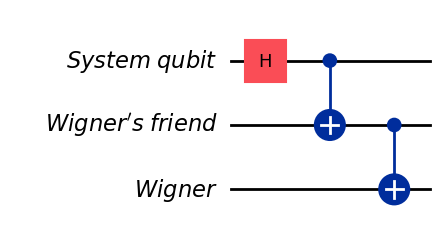

In [9]:
qc5= QuantumCircuit(qr1, qr2, qr3)
qc5.h(0)
qc5.cx(0,1)
qc5.cx(1,2)

qc5.draw("mpl")


Здесь нет противоречия между опытом Вигнера и его друга: друг Вигнера видит единичный результат измерения, вступая в запутанную суперпозицию с кубитом, а Вигнер видит единичный результат измерения, когда он вступает во взаимодействие с другом, запутываясь с ним и присоединяясь к этой запутанной суперпозиции, что приводит к следующему финальному состоянию:

$$\frac{1}{2}(|000\rangle + |111\rangle)$$

Рассмотрение Вигнера и его друга как полностью квантовых систем, без каких-либо необратимых операций измерения, таким образом, разрешает парадокс!

### Кот Шрёдингера под другим углом

Если вы смотрели моё предыдущее видео о мысленном эксперименте «Кот Шрёдингера», вы могли заметить одну закономерность: моя квантовая схема для «Друга Вигнера» точно такая же, как и схема для «Кота Шрёдингера», только с заменой атома, кота и наблюдателя на кубит системы, друга Вигнера и самого Вигнера!

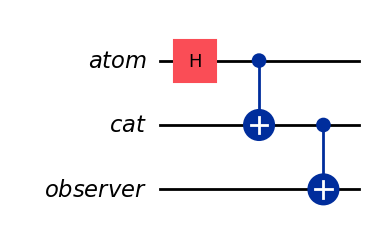

In [10]:
qr_atom = QuantumRegister(1, name="atom")
qr_cat = QuantumRegister(1, name="cat")
qr_observer = QuantumRegister(1, name="observer")

qc_cat = QuantumCircuit(qr_atom, qr_cat, qr_observer)

qc_cat.h(qr_atom[0])

qc_cat.cx(qr_atom[0], qr_cat[0])

qc_cat.cx(qr_cat[0], qr_observer[0])

qc_cat.draw("mpl")


Очевидные парадоксы, возникающие в обоих этих мысленных экспериментах, очень похожи в том, что оба разрешаются применением квантовой теории к макроскопическим системам, таким как детекторы, наблюдатели и окружающая среда. 

Однако эти эксперименты указывают на разные проблемы квантовой механики: «Кот Шрёдингера» подчёркивает абсурдность применения квантовой механики к макроскопическим системам, поскольку это означает, что кот может быть одновременно живым и мёртвым. 

С другой стороны, «Друг Вигнера» указывает на противоречие с расплывчатым понятием, что наблюдение вызывает необратимый коллапс, так как наблюдатели расходятся во мнении о том, когда этот коллапс происходит.

На самом деле «Друг Вигнера» выявляет проблему с наивным решением парадокса «Кота Шрёдингера»: можно сказать, что кот сам является наблюдателем, поэтому он вызывает коллапс квантового состояния радиоактивного атома и никогда не входит в суперпозицию состояний. 

Однако «Друг Вигнера» демонстрирует, что такой подход приводит к противоречию, так как наблюдатель кота и сам кот не согласятся, когда произошёл необратимый коллапс.

### Разве мы не можем просто это проверить?

Можем ли мы разработать экспериментальный тест, чтобы выяснить, выполняет ли «Друг Вигнера» необратимое измерение? Узнайте в следующей части серии «Парадоксы». До встречи!